In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv("부산광역시_od.csv")
df.head()

,origin_hdong_cd,dest_hdong_cd,origin_hdong_cd_시도명,origin_hdong_cd_시군구명,origin_hdong_cd_읍면동명,dest_hdong_cd_시도명,dest_hdong_cd_시군구명,dest_hdong_cd_읍면동명,date,start_time,...,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,weekday,is_holiday,is_weekend
0,2614061500,2611058000,부산광역시,서구,아미동,부산광역시,중구,남포동,2023-09-01,18:00,...,30대,차량,귀가,쇼핑여가,59052,77,9,금,평일,평일
1,2671025600,2671025300,부산광역시,기장군,정관읍,부산광역시,기장군,장안읍,2023-09-01,15:00,...,40대,차량,업무,업무,6370,12,9,금,평일,평일
2,2626051000,2626074000,부산광역시,동래구,수민동,부산광역시,동래구,안락제1동,2023-09-01,16:00,...,9세이하,차량,귀가,귀가,7012,13,47,금,평일,평일
3,2623051000,2623061000,부산광역시,부산진구,부전제1동,부산광역시,부산진구,전포제2동,2023-09-01,10:00,...,30대,차량,귀가,귀가,5604,18,11,금,평일,평일
4,2638056100,2638056200,부산광역시,사하구,하단제1동,부산광역시,사하구,하단제2동,2023-09-01,17:00,...,50대,차량,귀가,귀가,5980,9,12,금,평일,평일


In [ ]:
df

In [ ]:
df.dtypes

origin_hdong_cd          int64
dest_hdong_cd            int64
origin_hdong_cd_시도명     object
origin_hdong_cd_시군구명    object
origin_hdong_cd_읍면동명    object
dest_hdong_cd_시도명       object
dest_hdong_cd_시군구명      object
dest_hdong_cd_읍면동명      object
date                    object
start_time              object
end_time                object
gender                  object
age                     object
modal                   object
origin_purpose          object
dest_purpose            object
od_dist_avg              int64
od_duration_avg          int64
od_cnts                  int64
weekday                 object
is_holiday              object
is_weekend              object
dtype: object

In [ ]:
df['dest_hdong_cd_시도명'].nunique()

1

In [ ]:
df_train = df.loc[df['modal']=='철도']

In [ ]:
df_train.shape

(3494, 22)

In [ ]:
df_train.columns

Index(['origin_hdong_cd', 'dest_hdong_cd', 'origin_hdong_cd_시도명',
       'origin_hdong_cd_시군구명', 'origin_hdong_cd_읍면동명', 'dest_hdong_cd_시도명',
       'dest_hdong_cd_시군구명', 'dest_hdong_cd_읍면동명', 'date', 'start_time',
       'end_time', 'gender', 'age', 'modal', 'origin_purpose', 'dest_purpose',
       'od_dist_avg', 'od_duration_avg', 'od_cnts', 'weekday', 'is_holiday',
       'is_weekend'],
      dtype='object')

In [ ]:
df_train.head()

,origin_hdong_cd,dest_hdong_cd,origin_hdong_cd_시도명,origin_hdong_cd_시군구명,origin_hdong_cd_읍면동명,dest_hdong_cd_시도명,dest_hdong_cd_시군구명,dest_hdong_cd_읍면동명,date,start_time,...,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,weekday,is_holiday,is_weekend
2367,1156051500,2611052000,서울특별시,영등포구,영등포본동,부산광역시,중구,동광동,2023-09-01,10:00,...,10대,철도,여행,여행,517129,232,8,금,평일,평일
14050,2623064000,2632051000,부산광역시,부산진구,부암제1동,부산광역시,북구,구포제1동,2023-09-01,11:00,...,10대,철도,기타,기타,34058,33,7,금,평일,평일
14633,2632052000,2611052000,부산광역시,북구,구포제2동,부산광역시,중구,동광동,2023-09-01,11:00,...,50대,철도,기타,쇼핑여가,100546,102,7,금,평일,평일
23986,2623052000,2653060000,부산광역시,부산진구,부전제2동,부산광역시,사상구,덕포제1동,2023-09-01,13:00,...,40대,철도,업무,기타,108156,75,6,금,평일,평일
27086,4119074200,2653058000,경기도,부천시,신중동,부산광역시,사상구,삼락동,2023-09-01,12:00,...,40대,철도,여행,기타,784257,388,5,금,평일,평일


In [ ]:
# 부산으로 기차타고 오는 사람들은 어디서 왔을까?
df_train.groupby('origin_hdong_cd_시도명')['od_cnts'].sum().sort_values(ascending=False)

origin_hdong_cd_시도명
부산광역시      8398
서울특별시      5957
경기도        2339
울산광역시      2187
경상남도       1541
경상북도        627
대구광역시       563
충청남도        444
대전광역시       419
인천광역시       232
충청북도        223
세종특별자치시      50
강원특별자치도      40
전라북도         12
Name: od_cnts, dtype: int64

In [ ]:
df_train.groupby('origin_hdong_cd_시군구명')['od_cnts'].sum().sort_values(ascending=False).head(10)

origin_hdong_cd_시군구명
부산진구    2952
북구      1771
기장군     1659
용산구     1432
양산시     1248
남구       937
동구       932
울주군      884
중구       865
강남구      649
Name: od_cnts, dtype: int64

In [ ]:
# 부산으로 기차타고 오는 사람들은 어느 연력대일까?
df_train.groupby('age')['od_cnts'].sum().sort_values(ascending=False)

age
20대      8011
30대      4440
10대      3518
9세이하     3175
40대      2234
50대      1438
60대       178
70대        23
80세이상      15
Name: od_cnts, dtype: int64

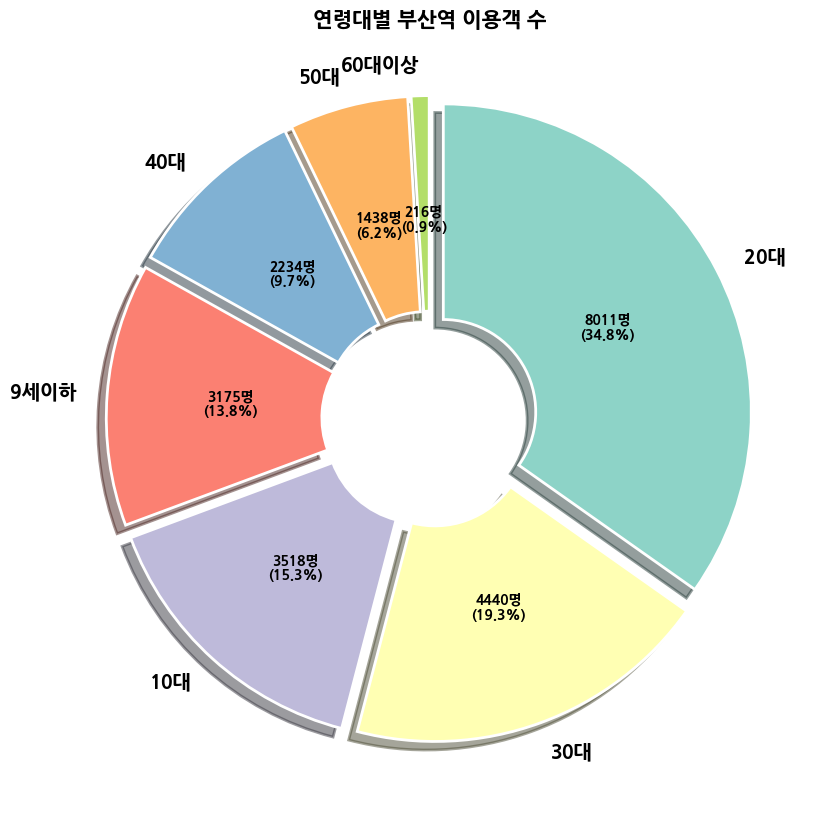

In [ ]:
labels = ['20대', '30대', '10대', '9세이하', '40대', '50대', '60대이상']
ratio = [8011, 4440, 3518, 3175, 2234, 1438, 216]

cmap = plt.get_cmap("Set3")
colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6, 7]))

# 비율과 이용객 수를 함께 표시하는 함수
def func(pct, allvalues):
    absolute = int(np.round(pct/100.*np.sum(allvalues)))
    return "{:d}명\n({:.1f}%)".format(absolute, pct)

# 색상 선택
cmap = plt.get_cmap("Set3")
colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6, 7]))

plt.figure(figsize=(10, 10))  # 그래프 크기 설정

# 파이 차트 그리기
wedges, texts, autotexts = plt.pie(ratio,
                                   labels=labels,
                                   autopct=lambda pct: func(pct, ratio),  # 이용객 수와 비율을 함께 표시
                                   startangle=90,  # 축이 시작되는 각도 설정
                                   counterclock=False,  # 반시계방향으로 설정
                                   explode=[0.05]*7,  # 모든 조각을 동일한 정도로 띄움
                                   shadow=True,  # 그림자 추가
                                   colors=colors,  # 색상 설정
                                   wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}  # 조각의 너비와 테두리 설정
                                  )

# 레이블(텍스트) 크기와 굵기 설정
for text in texts:
    text.set_fontsize(14)  # 레이블 글씨 크기
    text.set_fontweight('bold')  # 레이블 글씨 굵기

# 퍼센트 표시 텍스트 크기와 굵기 설정
for autotext in autotexts:
    autotext.set_fontsize(10)  # 퍼센트 표시 글씨 크기
    autotext.set_fontweight('bold')  # 퍼센트 표시 글씨 굵기

plt.title('연령대별 부산역 이용객 수', size=15, fontweight='bold')

plt.show()

In [ ]:
# 부산으로 기차타고 오는 사람들은 어느 성별이 많을까?
df_train.groupby('gender')['od_cnts'].sum().sort_values(ascending=False)

gender
여성    12155
남성    10877
Name: od_cnts, dtype: int64

In [ ]:
gender_counts = df_train.groupby('gender')['od_cnts'].sum()

# 전체 합계 계산
total_counts = gender_counts.sum()

# 각 성별의 비율 계산
gender_ratio = (gender_counts / total_counts) * 100

# 비율에 따라 정렬
gender_ratio_sorted = gender_ratio.sort_values(ascending=False)

# 결과 출력
print(gender_ratio_sorted)

gender
여성    52.774401
남성    47.225599
Name: od_cnts, dtype: float64


In [ ]:
# 부산으로 기차타고 오는 사람들은 어느 요일에 많이 이동할까?
df_train.groupby('weekday')['od_cnts'].sum().sort_values(ascending=False)

weekday
금    4748
토    4225
일    3920
목    2603
수    2568
월    2522
화    2446
Name: od_cnts, dtype: int64

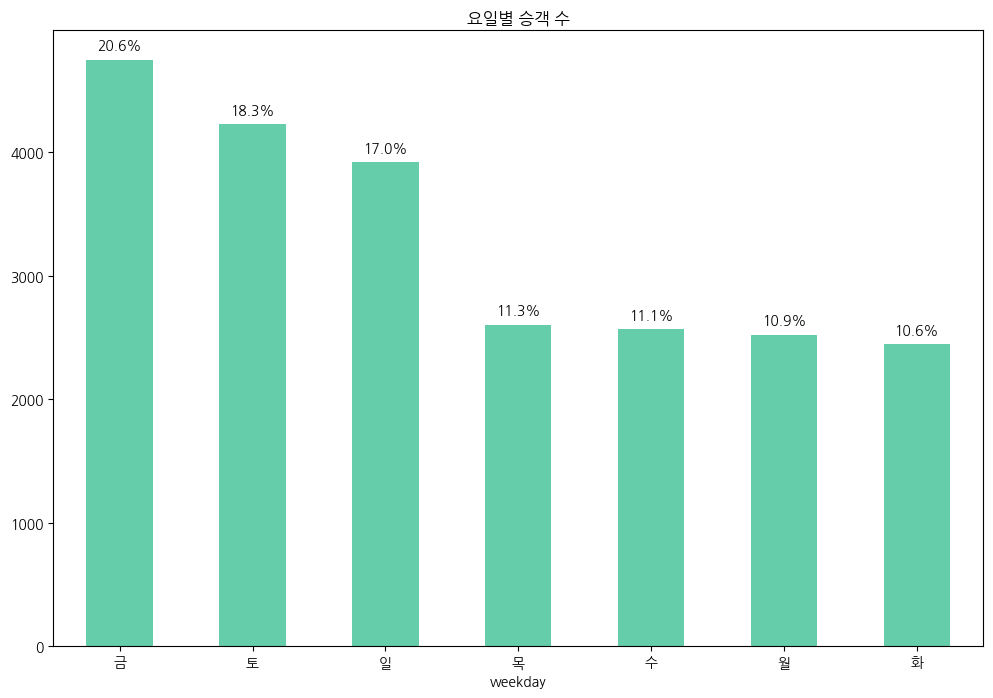

In [ ]:
df_weekday_counts = df_train.groupby('weekday')['od_cnts'].sum().sort_values(ascending=False)

# 전체 값 합계 (퍼센트 계산에 사용)
total = df_weekday_counts.sum()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
ax = df_weekday_counts.plot.bar(rot=0, color='#66CDAA', title='요일별 승객 수')

# 막대 위에 퍼센트 표시
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# 그래프 출력
plt.show()

<Figure size 1200x800 with 0 Axes>

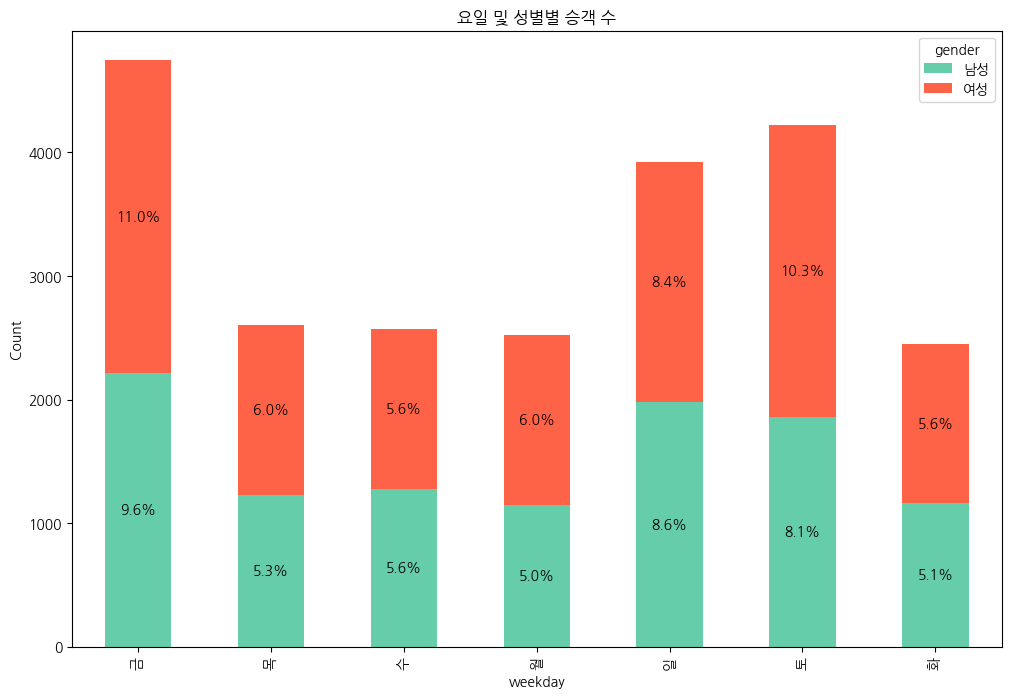

In [ ]:
# 요일별, 성별로 그룹화하여 od_cnts 합계 계산
df_weekday_gender_counts = df_train.groupby(['weekday', 'gender'])['od_cnts'].sum().sort_values(ascending=False).unstack()

# 전체 값 합계 (퍼센트 계산에 사용)
total = df_weekday_gender_counts.sum().sum()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
ax = df_weekday_gender_counts.plot(kind='bar', stacked=True, color=['#66CDAA', '#FF6347'], figsize=(12, 8), title='요일 및 성별별 승객 수')

# 막대 위에 퍼센트 표시
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    if height > 0:  # 막대가 0이 아닌 경우에만 퍼센트 표시
        percentage = f'{(height / total) * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + width / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=10)

# y축 레이블 설정
plt.ylabel('Count')

# 그래프 출력
plt.show()

<Figure size 1200x800 with 0 Axes>

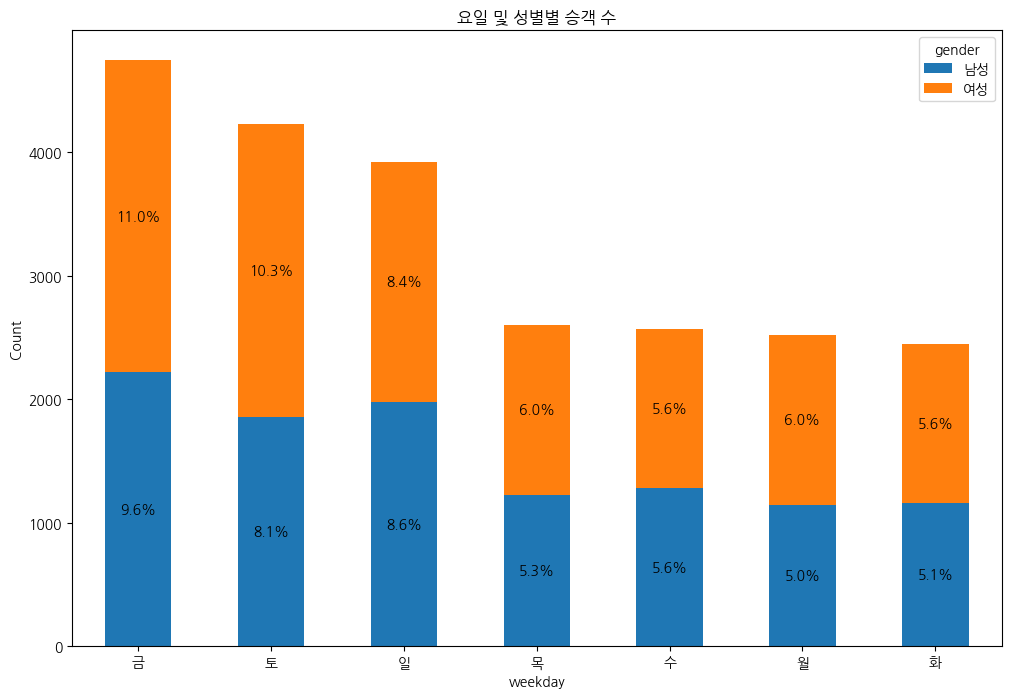

In [ ]:
# 요일별, 성별로 그룹화하여 od_cnts 합계 계산
df_weekday_gender_counts = df_train.groupby(['weekday', 'gender'])['od_cnts'].sum().unstack()

# 요일별 전체 합계 계산 (성별 포함하여)
df_weekday_total = df_weekday_gender_counts.sum(axis=1)

# 요일별 합계를 기준으로 큰 순서대로 정렬
df_weekday_gender_counts = df_weekday_gender_counts.loc[df_weekday_total.sort_values(ascending=False).index]

# 전체 값 합계 (퍼센트 계산에 사용)
total = df_weekday_gender_counts.sum().sum()

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
ax = df_weekday_gender_counts.plot(rot=0, kind='bar', stacked=True, figsize=(12, 8), title='요일 및 성별별 승객 수')

# 막대 위에 퍼센트 표시
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    if height > 0:  # 막대가 0이 아닌 경우에만 퍼센트 표시
        percentage = f'{(height / total) * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + width / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=10)

# y축 레이블 설정
plt.ylabel('Count')

# 그래프 출력
plt.show()

<Figure size 1200x800 with 0 Axes>

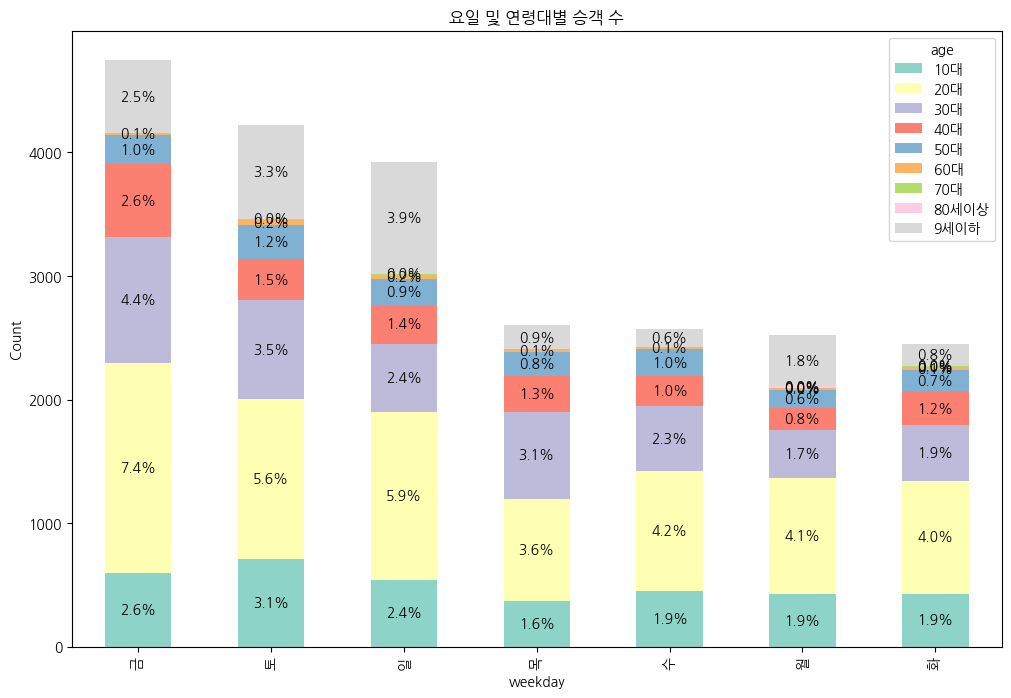

In [ ]:
# 요일별, 연령대별로 그룹화하여 od_cnts 합계 계산
df_weekday_age_counts = df_train.groupby(['weekday', 'age'])['od_cnts'].sum().unstack()

# 요일별 전체 합계 계산 (연령대 포함하여)
df_weekday_total = df_weekday_age_counts.sum(axis=1)

# 요일별 합계를 기준으로 큰 순서대로 정렬
df_weekday_age_counts = df_weekday_age_counts.loc[df_weekday_total.sort_values(ascending=False).index]

# 전체 값 합계 (퍼센트 계산에 사용)
total = df_weekday_age_counts.sum().sum()

# Set3 팔레트 설정
colors = sns.color_palette('Set3', n_colors=len(df_weekday_age_counts.columns))

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
ax = df_weekday_age_counts.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8), title='요일 및 연령대별 승객 수')

# 막대 위에 퍼센트 표시
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    if height > 0:  # 막대가 0이 아닌 경우에만 퍼센트 표시
        percentage = f'{(height / total) * 100:.1f}%'
        ax.annotate(percentage, (p.get_x() + width / 2., p.get_y() + height / 2.),
                    ha='center', va='center', fontsize=10)

# y축 레이블 설정
plt.ylabel('Count')

# 그래프 출력
plt.show()

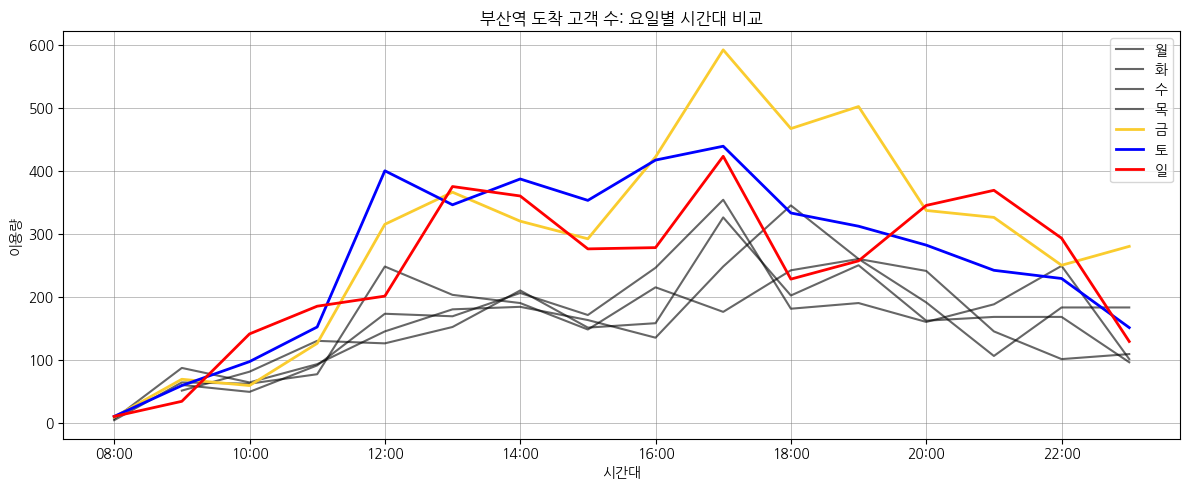

In [ ]:
# 요일별, 시간대별로 그룹화하여 od_cnts 합계 계산
day_hour = df_train.groupby(['weekday', 'end_time'])['od_cnts'].sum().unstack()

# 월~금, 토, 일 데이터를 각각 구분하여 그래프 그리기
plt.figure(figsize=(12, 5))


# 월~목 데이터 (일을 동시에 그리기 위해 색을 동일하게 설정)
day_hour.T[['월', '화', '수', '목']].plot(ax=plt.gca(), color='black', alpha=0.6)

# 금요일 데이터
day_hour.T['금'].plot(ax=plt.gca(), color='#FACC2E', linewidth=2)

# 토요일 데이터
day_hour.T['토'].plot(ax=plt.gca(), color='blue', linewidth=2)

# 일요일 데이터
day_hour.T['일'].plot(ax=plt.gca(), color='red', linewidth=2)

# 범례 및 그래프 설정
plt.legend(['월', '화', '수', '목', '금', '토', '일'])
plt.title('요일 x 시간대별 이용량 비교')
plt.xlabel('시간대')
plt.ylabel('이용량')

plt.title('부산역 도착 고객 수: 요일별 시간대 비교')
# 그래프 출력

plt.grid(True, which='both', axis='both', color='gray', linewidth=0.5, alpha=0.7)

# 그래프 출력
plt.tight_layout()
plt.show()


In [ ]:
df_train.groupby(['weekday', 'end_time'])['od_cnts'].sum().unstack()

end_time,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
weekday,,,,,,,,,,,,,,,,
금,10.0,70.0,60.0,127.0,316.0,367.0,321.0,293.0,423.0,593.0,468.0,503.0,338.0,327.0,251.0,281.0
목,NaN,61.0,50.0,92.0,174.0,170.0,207.0,172.0,247.0,355.0,182.0,191.0,161.0,189.0,250.0,102.0
수,5.0,65.0,63.0,78.0,249.0,204.0,191.0,149.0,216.0,177.0,243.0,261.0,192.0,107.0,184.0,184.0
월,7.0,88.0,65.0,94.0,146.0,181.0,185.0,164.0,136.0,249.0,346.0,261.0,242.0,146.0,102.0,110.0
일,11.0,35.0,142.0,186.0,202.0,376.0,361.0,277.0,279.0,424.0,229.0,258.0,346.0,370.0,294.0,130.0
토,11.0,60.0,98.0,153.0,401.0,347.0,388.0,354.0,418.0,440.0,334.0,313.0,283.0,243.0,230.0,152.0
화,NaN,52.0,82.0,131.0,127.0,153.0,211.0,152.0,159.0,327.0,203.0,251.0,163.0,169.0,169.0,97.0
